In [1]:
import tensorflow as tf

2023-03-21 15:02:28.111468: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-21 15:02:28.239852: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-21 15:02:28.239875: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-21 15:02:29.419725: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [225]:
x = tf.linspace(-2, 2, 201)
x = tf.cast(x, tf.float32)

def f(x):
  y = x**2 + 2*x - 5
  return y

y = f(x) + tf.random.normal(shape=[201])

In [226]:
class Quadratic(tf.Module):

  def __init__(self):
    # Randomly generate weight and bias terms
    rand_init = tf.random.uniform(shape=[3], minval=0., maxval=5., seed=22)
    # Initialize model parameters
    self.w_q = tf.Variable(rand_init[0])
    self.w_l = tf.Variable(rand_init[1])
    self.b = tf.Variable(rand_init[2])

  @tf.function
  def __call__(self, x):
    # Quadratic Model : quadratic_weight * x^2 + linear_weight * x + bias
    return self.w_q * (x**2) + self.w_l * x + self.b


In [227]:
quad_model = Quadratic()
#quad_model([1.0, 1.0])

In [168]:
@tf.function(input_signature=[tf.TensorSpec([None, None], tf.float32)])
def predict(self, x):
    return tf.nn.sigmoid(self(x))

In [169]:
Quadratic.predict = predict

In [174]:
quad_model.predict([[0.0, 1.0]])

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.62245935], dtype=float32)>

In [178]:
type(quad_model).predict = predict

In [214]:
def mse_loss(y_pred, y):
  return tf.reduce_mean(tf.square(y_pred - y))

In [6]:
import matplotlib
from matplotlib import pyplot as plt

matplotlib.rcParams['figure.figsize'] = [9, 6]

def plot_preds(x, y, f, model, title):
  plt.figure()
  plt.plot(x, y, '.', label='Data')
  plt.plot(x, f(x), label='Ground truth')
  plt.plot(x, model(x), label='Predictions')
  plt.title(title)
  plt.legend()

In [87]:
quad_model = Quadratic()


In [85]:
quad_model(0)

<tf.Tensor: shape=(), dtype=float32, numpy=0.42571366>

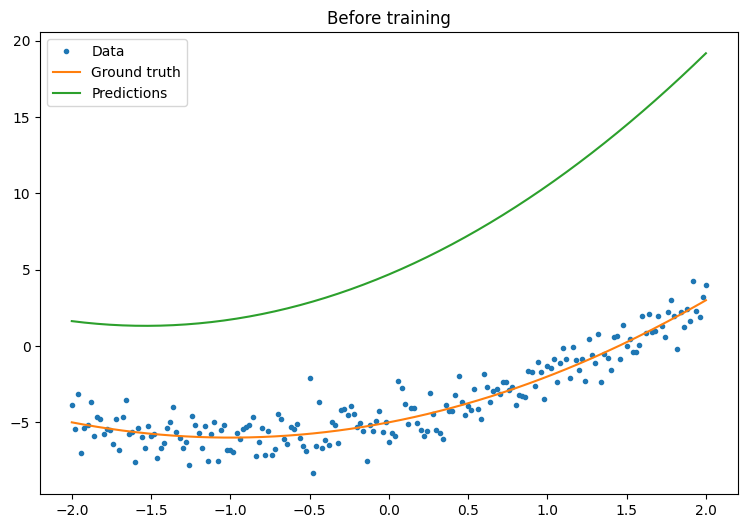

In [8]:
plot_preds(x, y, f, quad_model, 'Before training')

In [24]:
import numpy as np
quad_model(tf.constant(np.array([0.0]), tf.float32))

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([-4.9645033], dtype=float32)>

In [228]:
batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices((x, y))
dataset = dataset.shuffle(buffer_size=x.shape[0]).batch(batch_size)
dataset

<BatchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>

Mean squared error for step 0: 60.717
Mean squared error for step 10: 9.452
Mean squared error for step 20: 3.818
Mean squared error for step 30: 1.900
Mean squared error for step 40: 1.224
Mean squared error for step 50: 0.982
Mean squared error for step 60: 0.901
Mean squared error for step 70: 0.875
Mean squared error for step 80: 0.863
Mean squared error for step 90: 0.863




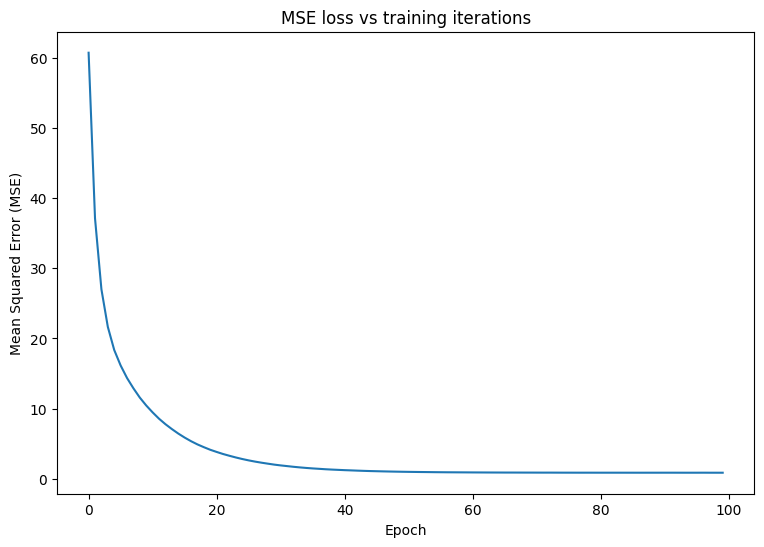

In [229]:
# Set training parameters
epochs = 100
learning_rate = 0.01
losses = []


# Format training loop
for epoch in range(epochs):
  i = 0
  for x_batch, y_batch in dataset:
    i = i + 1
    with tf.GradientTape() as tape:
      batch_loss = mse_loss(quad_model(x_batch), y_batch)
    # Update parameters with respect to the gradient calculations
    grads = tape.gradient(batch_loss, quad_model.variables)
    for g,v in zip(grads, quad_model.variables):
        v.assign_sub(learning_rate*g)
  # Keep track of model loss per epoch
  loss = mse_loss(quad_model(x), y)
  losses.append(loss)
  if epoch % 10 == 0:
    print(f'Mean squared error for step {epoch}: {loss.numpy():0.3f}')

# Plot model results
print("\n")
plt.plot(range(epochs), losses)
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error (MSE)")
plt.title('MSE loss vs training iterations');

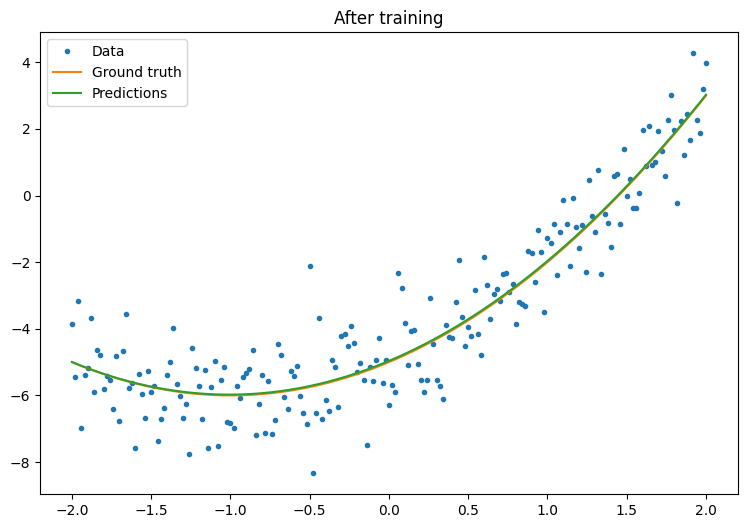

In [14]:
plot_preds(x, y, f, quad_model, 'After training')

In [202]:
call_sig = quad_model.__call__.get_concrete_function(tf.TensorSpec([None], tf.float32))
#predict_sig = quad_model.predict.get_concrete_function(tf.TensorSpec([None,2], tf.float32))
signatures = {"serving_default": call_sig,  "predict": predict_sig}

In [230]:
tf.saved_model.save(quad_model, "./quad/10", signatures=signatures)


INFO:tensorflow:Assets written to: ./quad/10/assets


In [54]:
model = Model()

In [91]:
reload(0.0)

<tf.Tensor: shape=(), dtype=float32, numpy=1.2149769>

In [188]:
reload = tf.saved_model.load("./quad/7")


OSError: SavedModel file does not exist at: ./quad/7/{saved_model.pbtxt|saved_model.pb}

In [76]:
infer = reload.signatures["serving_default"]
print(infer.structured_outputs)

{'output_0': TensorSpec(shape=(1,), dtype=tf.float32, name='output_0')}


In [65]:
tf.constant([[0.0][0.0][0.0]], tf.float32)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0. , 0.2], dtype=float32)>

In [81]:
assert len(reload.signatures) == 0

AssertionError: 

In [186]:
reload.predict([[0.0, 1.0]])

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.62245935], dtype=float32)>

In [183]:
list(reload.signatures.keys())

['serving_default', 'predict']

In [185]:
type(reload)

tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject

In [187]:
reload.variables

AttributeError: '_UserObject' object has no attribute 'variables'

In [232]:
checkpoint = tf.train.Checkpoint(quad_model)

In [236]:
checkpoint.restore("./quad/10").expect_partial()

In [237]:
quad_model.variables

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-4.8820605>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.992843>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.98067236>)

In [238]:
model2 = Quadratic()

In [242]:
model2.variables

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-4.8820605>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.992843>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.98067236>)

In [241]:
tf.train.Checkpoint(model2).restore("./quad/10").expect_partial()